In [2]:
##Data Cleaning and analysis

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Covid19Indiafinal.csv')
df

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
145844,22790,2.0,07/07/2020,NaN,NaN,NaN,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,Hospitalized,7,7,2020
145845,22791,-9.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145846,22792,-6.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145847,22793,-1.0,07/07/2020,NaN,NaN,NaN,Kozhikode,Kerala,Recovered,7,7,2020


In [5]:
data=df.iloc[:,1:]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
145844,2.0,07/07/2020,NaN,NaN,NaN,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,Hospitalized,7,7,2020
145845,-9.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145846,-6.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,Recovered,7,7,2020
145847,-1.0,07/07/2020,NaN,NaN,NaN,Kozhikode,Kerala,Recovered,7,7,2020


In [6]:
##Inspect data


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145849 entries, 0 to 145848
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Num Cases          145846 non-null  float64
 1   Date Announced     145849 non-null  object 
 2   Age Bracket        60013 non-null   object 
 3   Gender             62808 non-null   object 
 4   Detected City      10949 non-null   object 
 5   Detected District  137451 non-null  object 
 6   Detected State     145840 non-null  object 
 7   Current Status     145847 non-null  object 
 8   Day                145849 non-null  int64  
 9   Month              145849 non-null  int64  
 10  Year               145849 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 12.2+ MB


In [8]:
#Inspect Null Values in each Column

In [9]:
data.isnull().sum(axis=0).sort_values()

Date Announced            0
Day                       0
Month                     0
Year                      0
Current Status            2
Num Cases                 3
Detected State            9
Detected District      8398
Gender                83041
Age Bracket           85836
Detected City        134900
dtype: int64

In [10]:
data.isnull().sum(axis=0).sort_values(ascending=False)/len(data)*100 #gives the percentage of values that are  missing

Detected City        92.492921
Age Bracket          58.852649
Gender               56.936283
Detected District     5.758010
Detected State        0.006171
Num Cases             0.002057
Current Status        0.001371
Year                  0.000000
Month                 0.000000
Day                   0.000000
Date Announced        0.000000
dtype: float64

In [11]:
#round(val,2)

In [12]:
##Inspect Null Values in each Row

In [13]:
data.isnull().sum(axis=1).sort_values(ascending=False)

28451     6
69009     6
69008     6
4375      5
28398     5
         ..
108695    0
108694    0
108693    0
108692    0
0         0
Length: 145849, dtype: int64

In [14]:
##Total Covid-19 cases month wise

In [15]:
data.groupby('Month')['Num Cases'].sum()

Month
1         1.0
2         2.0
3      1635.0
4     36078.0
5    242853.0
6    663178.0
7    270185.0
Name: Num Cases, dtype: float64

In [16]:
data['Current Status']=='Hospitalized'

0         False
1         False
2         False
3         False
4         False
          ...  
145844     True
145845    False
145846    False
145847    False
145848    False
Name: Current Status, Length: 145849, dtype: bool

In [18]:
data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()

Month
3      1431.0
4     33209.0
5    155781.0
6    395144.0
7    157701.0
Name: Num Cases, dtype: float64

In [19]:
#

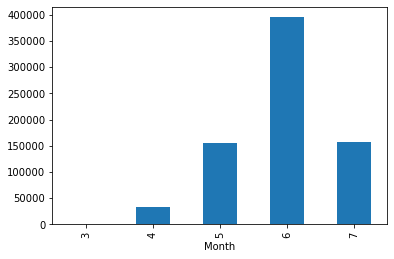

In [20]:
M=data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
M.plot.bar()
plt.show()

In [21]:
##Total Male/Female infected with coronavirus

In [22]:
data.groupby('Gender')['Num Cases'].sum()

Gender
F             21294.0
M             42795.0
M                 1.0
Non-Binary       12.0
Name: Num Cases, dtype: float64

In [23]:
#50% male are infected

In [24]:
##Which age group is infected the most?


In [25]:
data.groupby('Age Bracket')['Num Cases'].sum()

Age Bracket
0.1      3.0
0.6      1.0
0.9      3.0
1.0     20.0
1.5      1.0
        ... 
97       1.0
97.0     1.0
98.0     2.0
99       2.0
99.0     1.0
Name: Num Cases, Length: 325, dtype: float64

In [26]:
data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False)

Age Bracket
30.0        1209.0
40.0        1027.0
25.0        1015.0
35.0         992.0
32.0         936.0
             ...  
1.6            1.0
29.6           1.0
5 Months       1.0
54.9           1.0
99.0           1.0
Name: Num Cases, Length: 325, dtype: float64

In [27]:
#if age is between 30 and 40 max chances of corona

In [28]:
M=data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)
M

Age Bracket
30.0    1209.0
40.0    1027.0
25.0    1015.0
35.0     992.0
32.0     936.0
45.0     893.0
24.0     880.0
28.0     858.0
27.0     818.0
26.0     810.0
Name: Num Cases, dtype: float64

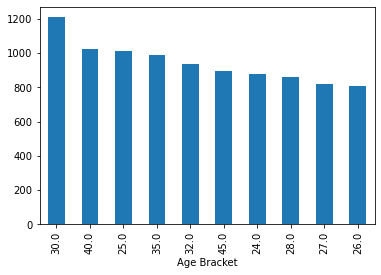

In [29]:
M.plot.bar()
plt.show()

In [30]:
##Check state wise Total Cases in India

In [31]:
data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum()


Detected State
Andaman and Nicobar Islands                    136.0
Andhra Pradesh                               21195.0
Arunachal Pradesh                              276.0
Assam                                        13337.0
Bihar                                        12524.0
Chandigarh                                     492.0
Chhattisgarh                                  3407.0
Dadra and Nagar Haveli and Daman and Diu       427.0
Delhi                                       102827.0
Goa                                           1903.0
Gujarat                                      37631.0
Haryana                                      17987.0
Himachal Pradesh                              1081.0
Jammu and Kashmir                             8930.0
Jharkhand                                     3018.0
Karnataka                                    26743.0
Kerala                                        5834.0
Ladakh                                        1041.0
Madhya Pradesh                 

In [32]:
M=data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
M

Detected State
Maharashtra                                 217107.0
Tamil Nadu                                  118587.0
Delhi                                       102827.0
Gujarat                                      37631.0
Uttar Pradesh                                29959.0
Telangana                                    27610.0
Karnataka                                    26743.0
West Bengal                                  23831.0
Rajasthan                                    21400.0
Andhra Pradesh                               21195.0
Haryana                                      17987.0
Madhya Pradesh                               15625.0
Assam                                        13337.0
Bihar                                        12524.0
Odisha                                       10096.0
Jammu and Kashmir                             8930.0
Punjab                                        6747.0
Kerala                                        5834.0
State Unassigned               

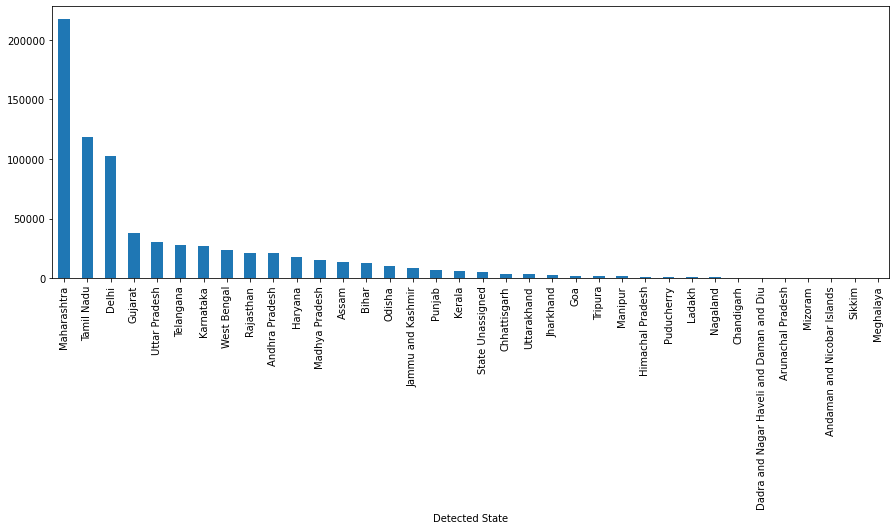

In [33]:
M.plot.bar(figsize=(15,5))
plt.show()

In [34]:
#verifyed from map on site

In [35]:
##Cases each day

In [36]:
Day=data[data['Current Status']=='Hospitalized'].groupby(['Month','Day'])['Num Cases'].sum()
Day

Month  Day
3      4          5.0
       5          1.0
       7          2.0
       9          4.0
       10         4.0
               ...   
7      3      22718.0
       4      24018.0
       5      23942.0
       6      22500.0
       7      23147.0
Name: Num Cases, Length: 124, dtype: float64

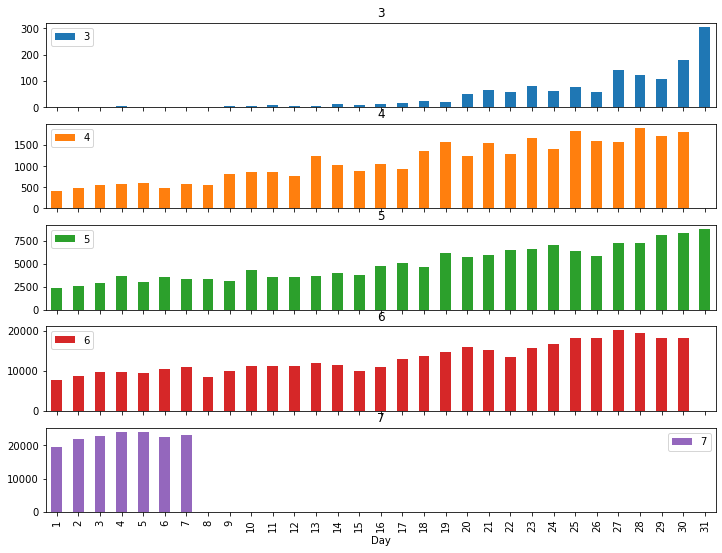

In [42]:
Day.unstack(level=0).plot(kind='bar',subplots=True,figsize=(12,9))
plt.show()

In [38]:
data['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan, 'Migrated_other'], dtype=object)

In [51]:
data[data['Current Status']=='Deceased']['Num Cases'].sum()

19817.0

In [48]:
df_new = data[data['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
df_new.column = ['Deceased']
df_new


Detected State
Maharashtra                                 8919.0
Delhi                                       3112.0
Gujarat                                     1831.0
Tamil Nadu                                  1613.0
Uttar Pradesh                                798.0
West Bengal                                  787.0
Madhya Pradesh                               521.0
Rajasthan                                    432.0
Karnataka                                    409.0
Telangana                                    289.0
Haryana                                      276.0
Andhra Pradesh                               221.0
Punjab                                       159.0
Jammu and Kashmir                            138.0
Bihar                                         97.0
Odisha                                        54.0
Uttarakhand                                   43.0
Kerala                                        27.0
Jharkhand                                     19.0
Assam           

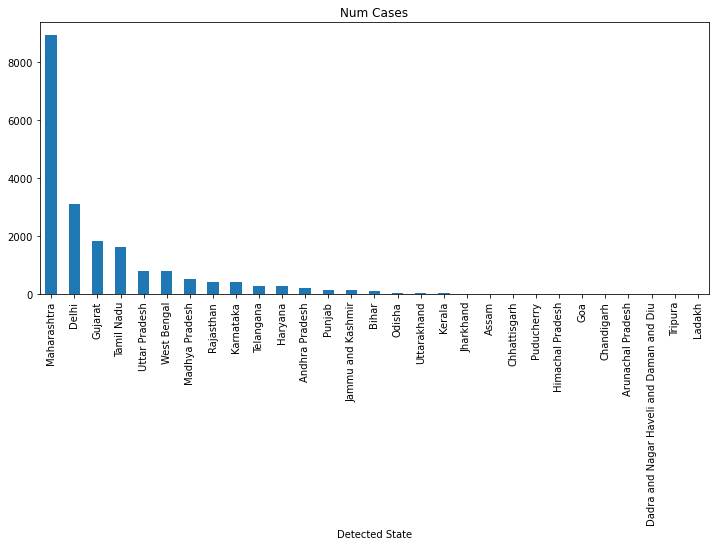

In [52]:
df_new.plot(kind='bar',subplots=True,figsize=(12,5))
plt.show()